In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#ccebff'
#%matplotlib inline

In [362]:
# Loading data

reservations = pd.read_csv("../Data/reservations_(5).csv")
vehicles = pd.read_csv("../Data/vehicles_(6).csv")
print("Dimensions of vehicles dataset: ",vehicles.shape)
print("Dimensions of reservations dataset: ",reservations.shape)

Dimensions of vehicles dataset:  (1000, 7)
Dimensions of reservations dataset:  (6376, 2)


In [363]:
vehicles.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description
0,1,1,67.85,59,5,0,7
1,2,0,100.70,53,5,0,224
2,3,0,74.00,74,4,1,21
3,4,0,135.00,75,1,0,184
4,5,0,59.36,53,2,1,31


In [364]:
reservations.head()

,vehicle_id,reservation_type
0,208,1
1,601,3
2,993,1
3,423,2
4,685,3


In [365]:
reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 2 columns):
vehicle_id          6376 non-null int64
reservation_type    6376 non-null int64
dtypes: int64(2)
memory usage: 99.7 KB


In [366]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
vehicle_id           1000 non-null int64
technology           1000 non-null int64
actual_price         1000 non-null float64
recommended_price    1000 non-null int64
num_images           1000 non-null int64
street_parked        1000 non-null int64
description          1000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [367]:
len(reservations["vehicle_id"].unique()) == len(vehicles["vehicle_id"].unique()) 

False

In [368]:
reservations["reservation_type"].unique()

array([1, 3, 2])

In [369]:
from collections import Counter
print("Number of unique Reservations:",len(reservations["vehicle_id"].unique()))
print("Total Number of reservations:",reservations.shape[0])

Number of unique Reservations: 911
Total Number of reservations: 6376


This shows that there are multiple reservations for a single vehicle type.

In [370]:
print("Are all rows unique in vehicle dataset? : ",len(vehicles["vehicle_id"]) == len(vehicles["vehicle_id"].unique()))
vehicles_not_reserved_ever = set(vehicles["vehicle_id"].unique()) - set(reservations["vehicle_id"].unique())
print("Never have I ever booked these vehicles:",vehicles_not_reserved_ever)

Are all rows unique in vehicle dataset? :  True
Never have I ever booked these vehicles: {7, 523, 13, 528, 537, 538, 33, 45, 560, 579, 580, 587, 590, 597, 86, 101, 104, 112, 635, 644, 654, 143, 672, 161, 168, 170, 682, 683, 706, 198, 209, 214, 738, 239, 241, 755, 758, 760, 761, 765, 255, 771, 783, 272, 785, 793, 803, 815, 819, 309, 823, 322, 329, 334, 337, 342, 856, 346, 859, 868, 357, 361, 875, 879, 373, 886, 895, 902, 903, 905, 911, 400, 925, 944, 945, 438, 955, 444, 452, 454, 969, 972, 461, 973, 974, 992, 487, 488, 502}


In [371]:
len(vehicles_not_reserved_ever)

89

Out of 1000 vehicles 89 were never booked.

In [372]:
# Creating a new dataset for total reservations.
total_reservations_per_vehicle = Counter(reservations["vehicle_id"])
total_reservation_dataframe = pd.DataFrame({"vehicle_id":list(total_reservations_per_vehicle.keys()),
                                            "total_reservations":list(total_reservations_per_vehicle.values())})
total_reservation_dataframe.head(20)

,total_reservations,vehicle_id
0,1,1
1,7,2
2,17,3
3,2,4
4,2,5
5,13,6
6,8,8
7,11,9
8,9,10
9,4,11


In [373]:
# Join the tables.
new_vehicles = pd.merge(vehicles,total_reservation_dataframe,how="left",on="vehicle_id")

# Impute the values.
new_vehicles = new_vehicles.fillna(0)
print(new_vehicles.shape)
new_vehicles.head(20)


(1000, 8)


,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,total_reservations
0,1,1,67.85,59,5,0,7,1.0
1,2,0,100.70,53,5,0,224,7.0
2,3,0,74.00,74,4,1,21,17.0
3,4,0,135.00,75,1,0,184,2.0
4,5,0,59.36,53,2,1,31,2.0
5,6,0,82.15,53,5,1,44,13.0
6,7,0,165.17,83,3,0,32,0.0
7,8,0,98.56,88,5,1,174,8.0
8,9,1,69.96,44,4,1,32,11.0
9,10,0,98.04,76,4,1,204,9.0


In [374]:
new_vehicles.shape
new_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
vehicle_id            1000 non-null int64
technology            1000 non-null int64
actual_price          1000 non-null float64
recommended_price     1000 non-null int64
num_images            1000 non-null int64
street_parked         1000 non-null int64
description           1000 non-null int64
total_reservations    1000 non-null float64
dtypes: float64(2), int64(6)
memory usage: 70.3 KB


In [375]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
columns = new_vehicles.columns[1:new_vehicles.shape[1]-1]
sc = StandardScaler()
sc.fit(new_vehicles.iloc[:,1:new_vehicles.shape[1]-1])
new_vehicle_std = sc.transform(new_vehicles.iloc[:,1:new_vehicles.shape[1]-1])
new_vehicle_std.shape

(1000, 6)

In [376]:
lr = ElasticNet(alpha=0.05,l1_ratio = 0.6)
y = new_vehicles.iloc[:,[new_vehicles.shape[1]-1]]
lr.fit(new_vehicle_std,y)

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

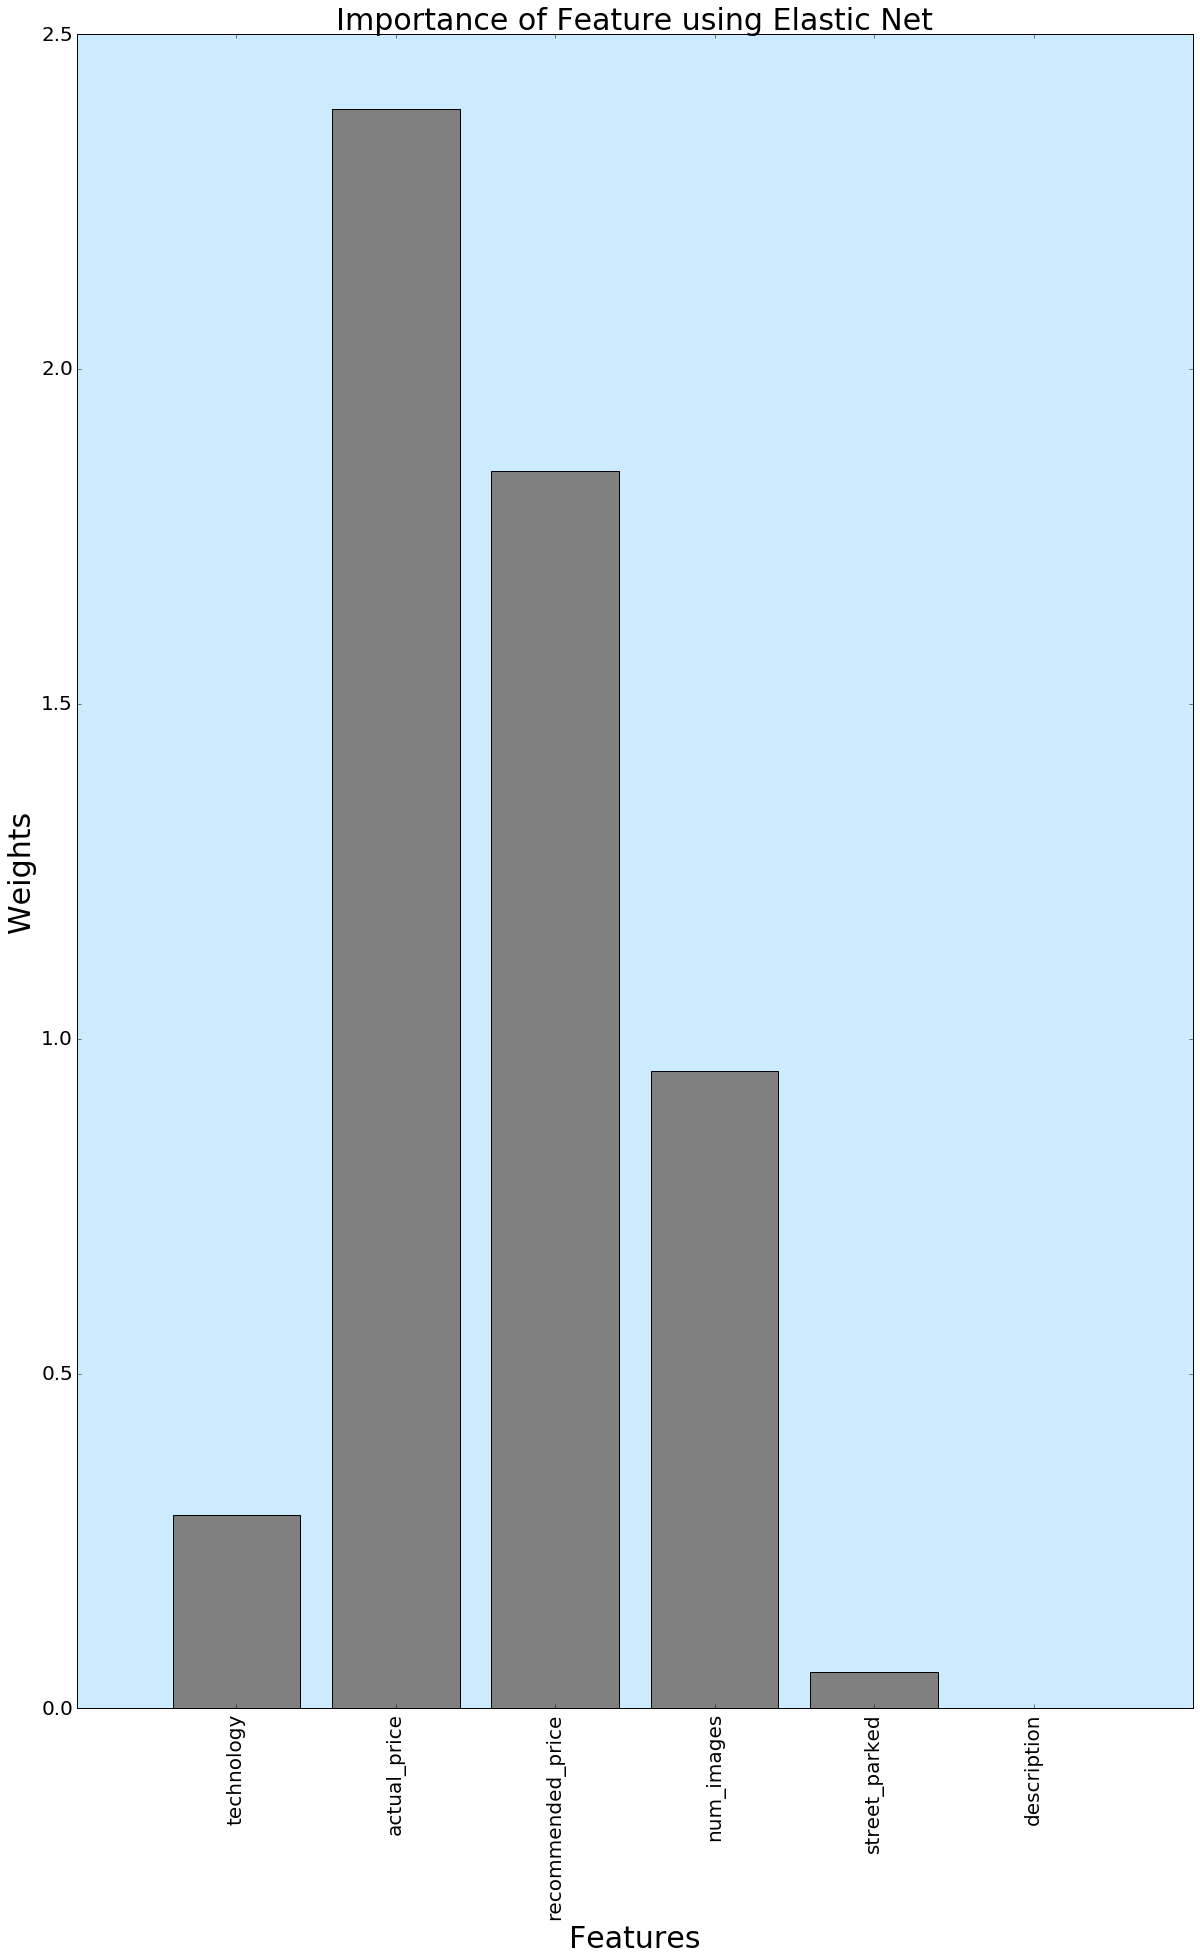

In [434]:
plt.figure(figsize=(20,30))
plt.title('Importance of Feature using Elastic Net',fontsize=30)
plt.bar(range(new_vehicle_std.shape[1]),abs(lr.coef_),color='grey',align='center')
plt.xticks(range(new_vehicle_std.shape[1]),columns,rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Features",fontsize=30)
plt.ylabel("Weights",fontsize=30)
plt.savefig("elastic_net.png",dpi=150)

In [378]:
y_pred = lr.predict(new_vehicle_std)
y = np.array(y["total_reservations"])
error = sum((y-y_pred)**2)
print("SSE=",error)

SSE= 19138.0923301


This shows that the linear regression gives high weights on the actual_price,num_images available. These two features appears to be highly important as per weight coefficients in linear regression.

In [379]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(new_vehicle_std,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [380]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

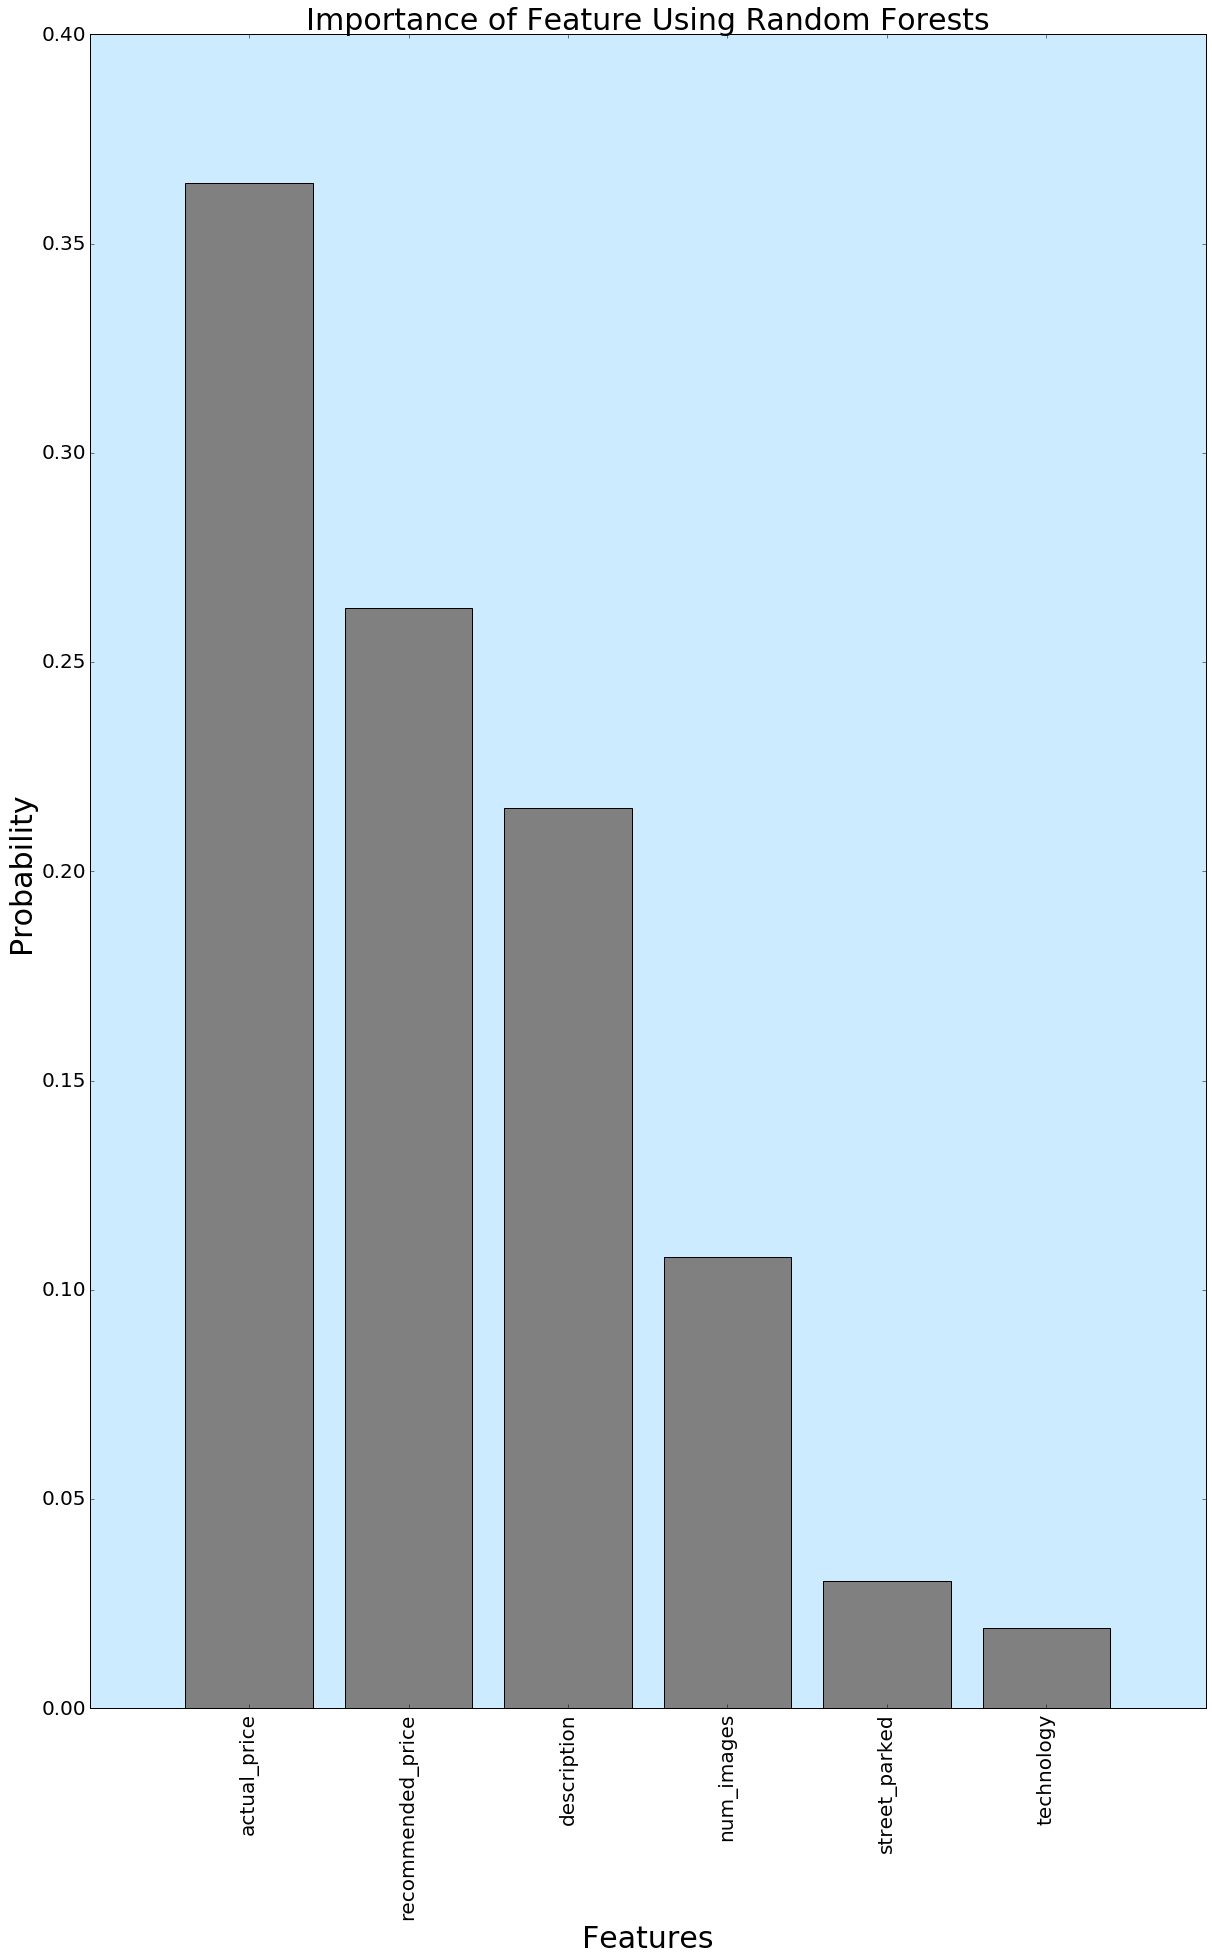

In [439]:
plt.figure(figsize=(20,30))
plt.title('Importance of Feature Using Random Forests',fontsize=30)
plt.bar(range(new_vehicle_std.shape[1]),importances[indices],color='grey',align='center')
plt.xlabel("Features",fontsize=30)
plt.ylabel("Probability",fontsize=30)
plt.xticks(range(new_vehicle_std.shape[1]),columns[indices],rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Random_Forest.png",dpi=150)
plt.show()

Now, according to random forest actual_price, recommended_price and description are the most important. Right now we are only sure that **pricings** are the key important features. Taking the votes from Elastic Net and Random Forests.

In real world, this often true. The better the price are and better the description is, that car is highly likely to be booked.

Now, lets see if our experiment and finding were actually correct or not.

In [382]:
# Subselect the features {acutal_price, recommended_price and description}
vehicle_subset = new_vehicles.loc[:,["vehicle_id","actual_price","recommended_price","description","total_reservations"]]

In [383]:
vehicle_subset.head()

,vehicle_id,actual_price,recommended_price,description,total_reservations
0,1,67.85,59,7,1.0
1,2,100.70,53,224,7.0
2,3,74.00,74,21,17.0
3,4,135.00,75,184,2.0
4,5,59.36,53,31,2.0


In [384]:
vehicle_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
vehicle_id            1000 non-null int64
actual_price          1000 non-null float64
recommended_price     1000 non-null int64
description           1000 non-null int64
total_reservations    1000 non-null float64
dtypes: float64(2), int64(3)
memory usage: 46.9 KB


In [385]:
vehicle_subset_sorted = vehicle_subset.sort_values(by="total_reservations",ascending=False)
vehicle_subset_sorted.head(20)

,vehicle_id,actual_price,recommended_price,description,total_reservations
246,247,61.80,60,208,25.0
482,483,51.50,50,50,25.0
686,687,82.62,81,10,25.0
811,812,86.86,86,142,24.0
689,690,58.14,57,24,24.0
633,634,83.43,81,4,21.0
270,271,64.64,64,1,21.0
344,345,46.20,44,216,20.0
177,178,47.85,55,46,20.0
606,607,58.32,54,204,20.0


In [386]:
vehicle_subset_sorted.tail(20)

,vehicle_id,actual_price,recommended_price,description,total_reservations
254,255,70.30,37,3,0.0
453,454,59.20,37,218,0.0
653,654,74.70,83,183,0.0
238,239,122.67,87,27,0.0
671,672,97.41,51,48,0.0
451,452,101.68,62,27,0.0
924,925,118.20,60,83,0.0
682,683,117.04,77,190,0.0
754,755,148.00,74,115,0.0
705,706,89.46,63,216,0.0


That is interesting. See people who are actually having *actual_price* near to that of *recommended_price* have been better rewarded by more number of reservations. They get better reservations. There can be many other hidden variables but this data doesn't have that information.

In [387]:
vehicle_subset_group = vehicle_subset.loc[:,["actual_price","recommended_price"]].groupby(vehicle_subset.total_reservations).mean()
print(vehicle_subset_group.shape)
vehicle_subset_group

(24, 2)


,actual_price,recommended_price
total_reservations,,
0.0,90.516517,61.000000
1.0,91.550164,61.245902
2.0,97.547640,64.595506
3.0,92.107526,62.175258
4.0,95.871979,62.500000
5.0,94.831609,62.103448
6.0,88.943396,62.641509
7.0,86.430645,62.338710
8.0,87.309649,62.157895


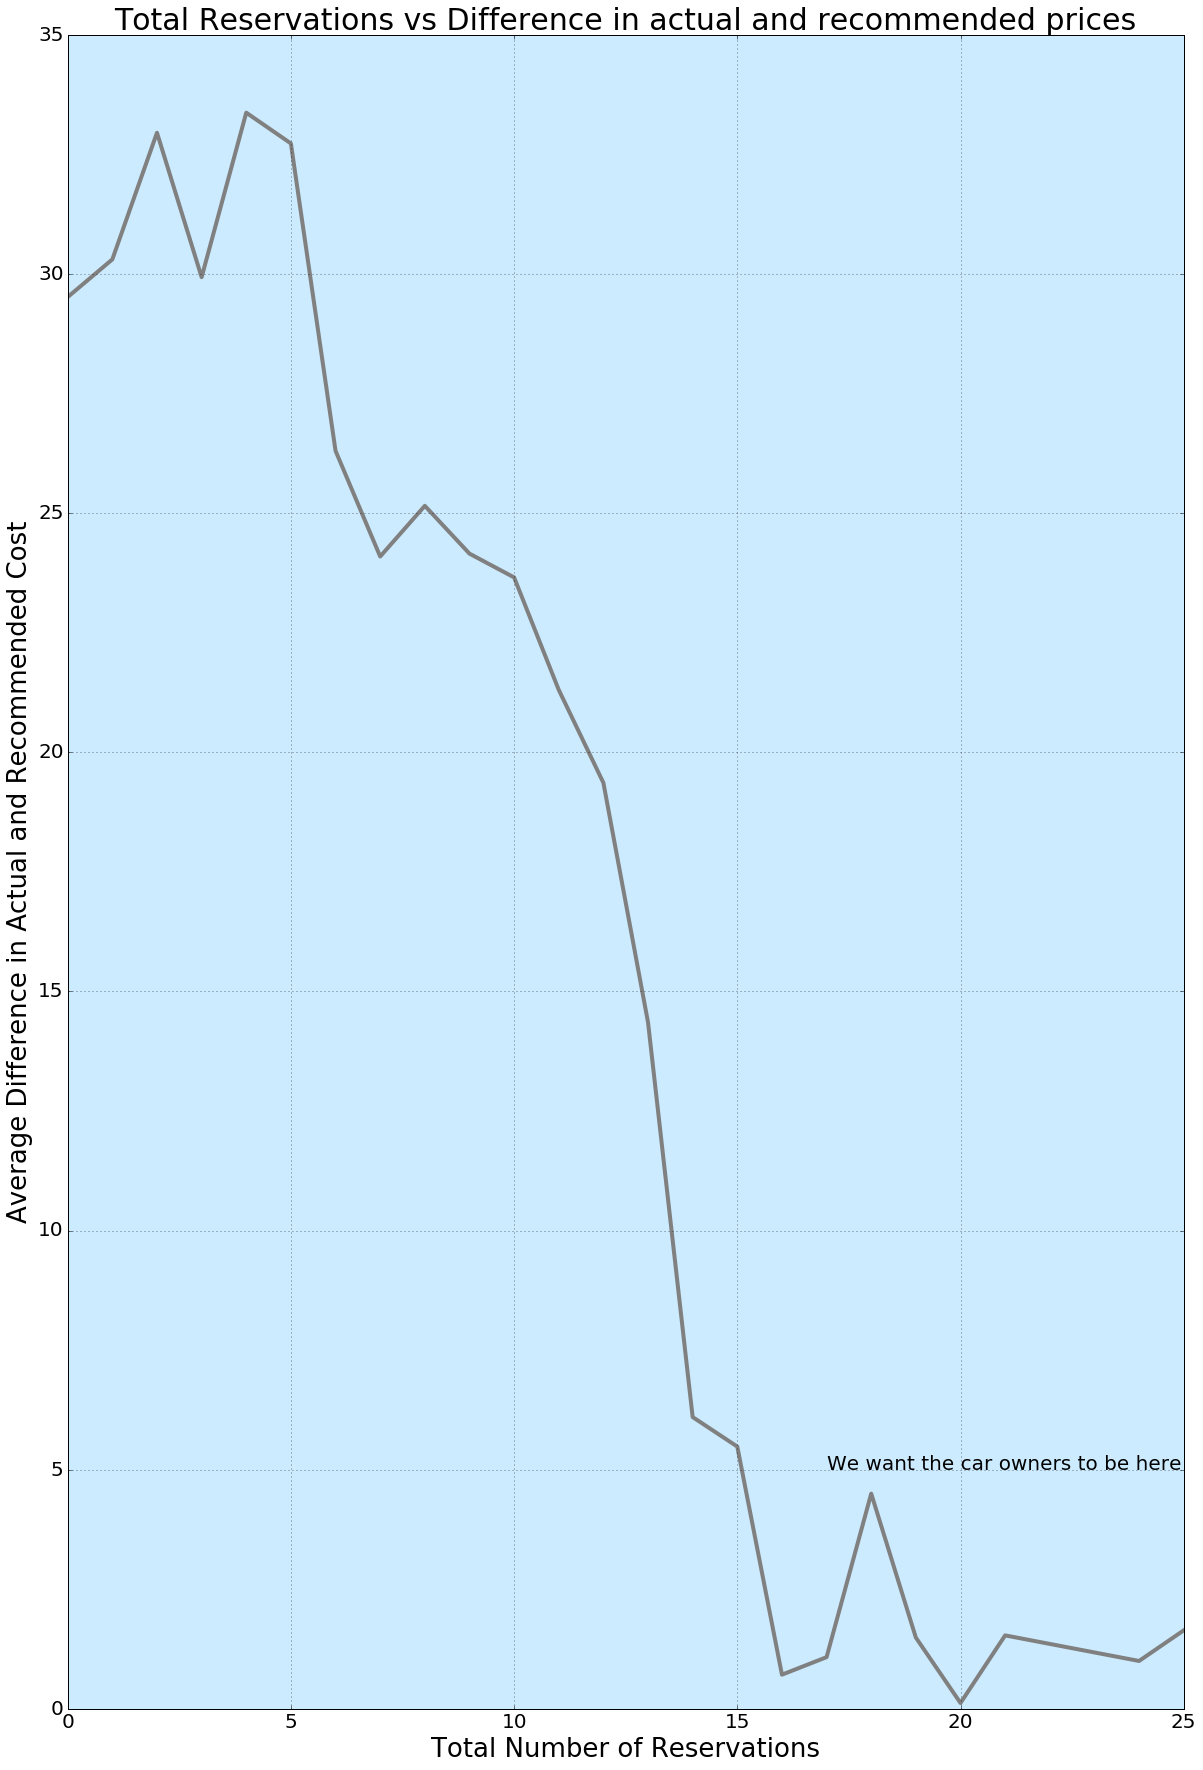

In [455]:
plt.figure(figsize=(20,30))
plt.plot(vehicle_subset_group.index,
         abs(vehicle_subset_group.actual_price - vehicle_subset_group.recommended_price),
         linewidth=4,color='grey')
plt.xlabel("Total Number of Reservations",fontsize=26)
plt.ylabel("Average Difference in Actual and Recommended Cost",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.text(17,5,"We want the car owners to be here",fontsize=20)
plt.title("Total Reservations vs Difference in actual and recommended prices",fontsize=30)
plt.savefig("Reservation_actual_recomm.png",dpi=150)
plt.show()

The above graph proves that if the owners want to have more reservations they should keep the actual price as near to the recommended price.

This shows that the **most important features in the dataset are the pricings, more specifically the difference in actual and recommended prices**. 

### Car technology and reservations.

In [389]:
vehicle_tech = new_vehicles.loc[:,["vehicle_id","technology","total_reservations"]]
vehicle_tech.head()

,vehicle_id,technology,total_reservations
0,1,1,1.0
1,2,0,7.0
2,3,0,17.0
3,4,0,2.0
4,5,0,2.0


In [390]:
vehicle_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
vehicle_id            1000 non-null int64
technology            1000 non-null int64
total_reservations    1000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 31.2 KB


In [391]:
veh_tec_tot_res = vehicle_tech.groupby("technology").sum().loc[:,["total_reservations"]]
veh_tec_tot_res

,total_reservations
technology,
0,5043.0
1,1333.0


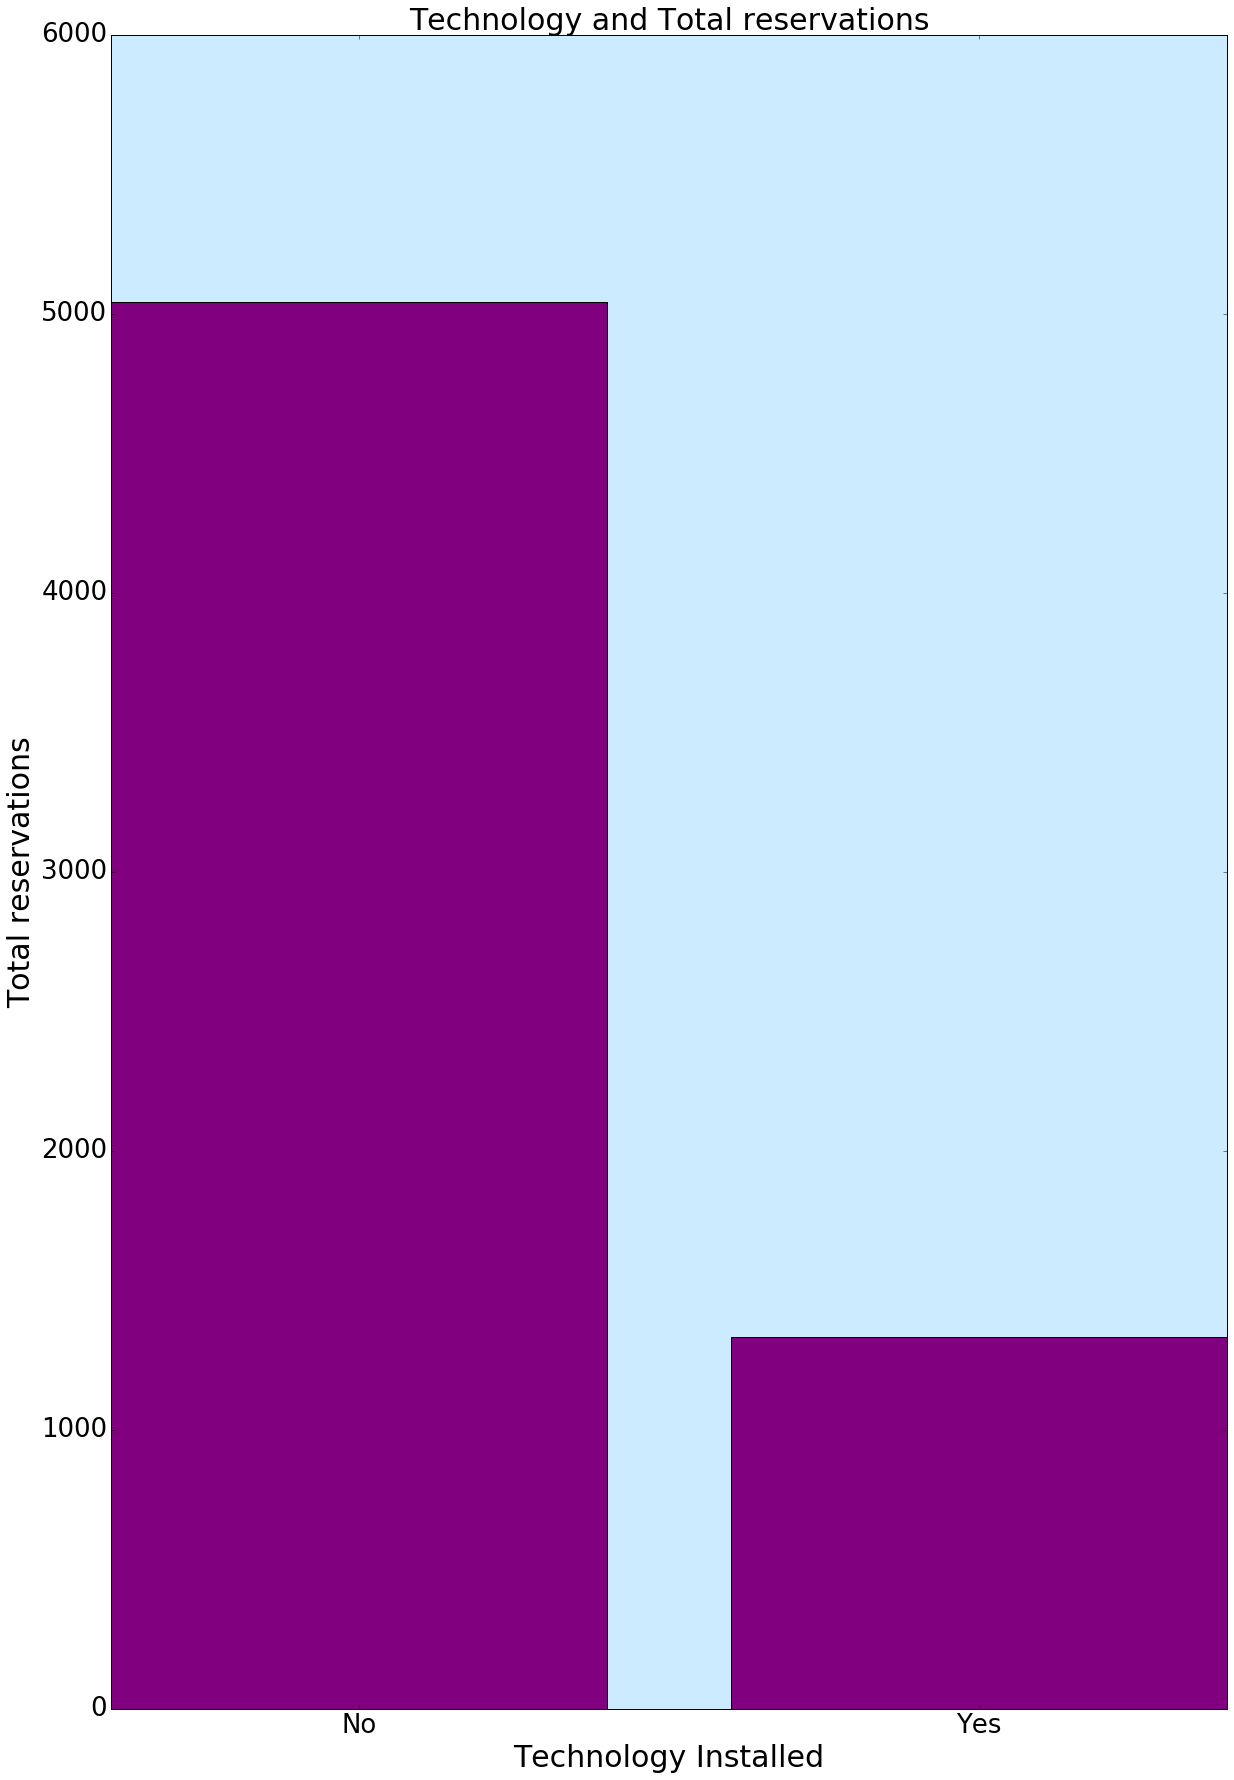

In [462]:
import matplotlib.ticker as ticker
pos_list = ("No","Yes")
plt.figure(figsize=(20,30))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator([0,1]))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(pos_list))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel("Technology Installed",fontsize=30)
plt.ylabel("Total reservations",fontsize=30)
plt.title("Technology and Total reservations",fontsize=30)
plt.bar([0,1],veh_tec_tot_res.total_reservations,align='center',color="purple")
plt.savefig("tech_res.png",dpi=150)
plt.show()

From this it seems that most of reservations that were made didn't have any technology involved in it. So, it seems most people don't want technology in their cars. 

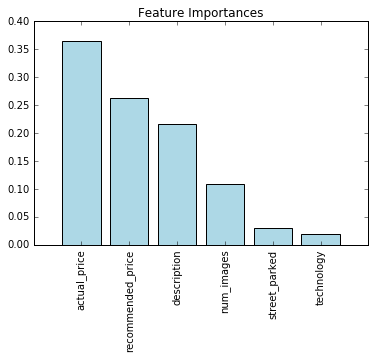

In [393]:
plt.title('Feature Importances')
plt.bar(range(new_vehicle_std.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(new_vehicle_std.shape[1]),columns[indices],rotation=90)
plt.show()

Also from our feature importance graph we can see that technology is the least important feature in the whole dataset and doesn't affect the total reservations much.

In [394]:
hourly_reservations = reservations.loc[(reservations.reservation_type == 1),:]
daily_reservations = reservations.loc[(reservations.reservation_type == 2),:]
weekly_reservations = reservations.loc[(reservations.reservation_type == 3),:]

In [395]:
print("## Hourly Reservations ##")
hourly_reservations.info()
print("\n")

print("## Daily Reservations ##")
daily_reservations.info()
print("\n")

print("## Weekly Reservations ##")
weekly_reservations.info()


## Hourly Reservations ##
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 6370
Data columns (total 2 columns):
vehicle_id          2339 non-null int64
reservation_type    2339 non-null int64
dtypes: int64(2)
memory usage: 54.8 KB


## Daily Reservations ##
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 3 to 6375
Data columns (total 2 columns):
vehicle_id          2057 non-null int64
reservation_type    2057 non-null int64
dtypes: int64(2)
memory usage: 48.2 KB


## Weekly Reservations ##
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 1 to 6373
Data columns (total 2 columns):
vehicle_id          1980 non-null int64
reservation_type    1980 non-null int64
dtypes: int64(2)
memory usage: 46.4 KB


In [396]:
hourly_veh_res = pd.merge(vehicles,hourly_reservations,on="vehicle_id",how="inner")
hourly_veh_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 8 columns):
vehicle_id           2339 non-null int64
technology           2339 non-null int64
actual_price         2339 non-null float64
recommended_price    2339 non-null int64
num_images           2339 non-null int64
street_parked        2339 non-null int64
description          2339 non-null int64
reservation_type     2339 non-null int64
dtypes: float64(1), int64(7)
memory usage: 164.5 KB


In [397]:
print("Hourly with technology:",hourly_veh_res.technology.sum())
print("Hourly without technology:",hourly_veh_res.shape[0] - hourly_veh_res.technology.sum())
print("With technology {:0.3f} %".format(hourly_veh_res.technology.sum()/(hourly_veh_res.shape[0])*100))
print("Without technology {:0.3f} %".format(100-(hourly_veh_res.technology.sum()/(hourly_veh_res.shape[0])*100)))

Hourly with technology: 650
Hourly without technology: 1689
With technology 27.790 %
Without technology 72.210 %


In [398]:
daily_veh_res = pd.merge(vehicles,daily_reservations,on="vehicle_id",how="inner")
daily_veh_res.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type
0,2,0,100.7,53,5,0,224,2
1,2,0,100.7,53,5,0,224,2
2,2,0,100.7,53,5,0,224,2
3,3,0,74.0,74,4,1,21,2
4,3,0,74.0,74,4,1,21,2


In [399]:
print("Daily with technology:",daily_veh_res.technology.sum())
print("Daily without technology:",daily_veh_res.shape[0] - daily_veh_res.technology.sum())
print("With technology {:0.3f} %".format(daily_veh_res.technology.sum()/(daily_veh_res.shape[0])*100))
print("Without technology {:0.3f} %".format(100-(daily_veh_res.technology.sum()/(daily_veh_res.shape[0])*100)))

Daily with technology: 352
Daily without technology: 1705
With technology 17.112 %
Without technology 82.888 %


In [400]:
weekly_veh_res = pd.merge(vehicles,weekly_reservations,on="vehicle_id",how="inner")
weekly_veh_res.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type
0,3,0,74.0,74,4,1,21,3
1,3,0,74.0,74,4,1,21,3
2,3,0,74.0,74,4,1,21,3
3,3,0,74.0,74,4,1,21,3
4,3,0,74.0,74,4,1,21,3


In [401]:
print("Weekly with technology:",weekly_veh_res.technology.sum())
print("Weekly without technology:",weekly_veh_res.shape[0] - daily_veh_res.technology.sum())
print("With technology {:0.3f} %".format(weekly_veh_res.technology.sum()/(weekly_veh_res.shape[0])*100))
print("Without technology {:0.3f} %".format(100-(weekly_veh_res.technology.sum()/(weekly_veh_res.shape[0])*100)))

Weekly with technology: 331
Weekly without technology: 1628
With technology 16.717 %
Without technology 83.283 %


It appears people don't want high technology cars. Question is why?